In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats

In [ ]:
aaupdf=pd.read_csv('aaup.data', header=None, sep=',',names=['FICE','College Name','State(Postal code)','Type','Average salary-full professors','Average salary-associate professors','Average salary-assistant professors','Average salary-all ranks','Average compensation-full professors','Average compensation-associate professors','Average compensation-assistant professors','Average compensation-all ranks','Number of full professors','Number of associate professors','Number of assistant professors','Number of instructors','Number of faculty-all ranks' ])
cols = ['Average salary-associate professors','Average salary-assistant professors','Average salary-full professors','Average compensation-full professors','Average compensation-associate professors','Average compensation-assistant professors' ]
aaupdf[cols] = aaupdf[cols].apply(pd.to_numeric, errors='coerce', axis=1)
aaupdf

,FICE,College Name,State(Postal code),Type,Average salary-full professors,Average salary-associate professors,Average salary-assistant professors,Average salary-all ranks,Average compensation-full professors,Average compensation-associate professors,Average compensation-assistant professors,Average compensation-all ranks,Number of full professors,Number of associate professors,Number of assistant professors,Number of instructors,Number of faculty-all ranks
0,1061,Alaska Pacific University,AK,IIB,454.0,382.0,362.0,382,567.0,485.0,471.0,487,6,11,9,4,32
1,1063,Univ.Alaska-Fairbanks,AK,I,686.0,560.0,432.0,508,914.0,753.0,572.0,677,74,125,118,40,404
2,1065,Univ.Alaska-Southeast,AK,IIA,533.0,494.0,329.0,415,716.0,663.0,442.0,559,9,26,20,9,70
3,11462,Univ.Alaska-Anchorage,AK,IIA,612.0,507.0,414.0,498,825.0,681.0,557.0,670,115,124,101,21,392
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442.0,369.0,310.0,350,530.0,444.0,376.0,423,59,77,102,24,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3825,West Virginia Inst. of Tech.,WV,IIB,408.0,340.0,297.0,349,502.0,419.0,369.0,431,54,43,29,11,137
1157,3827,West Virginia University,WV,I,535.0,431.0,361.0,439,642.0,521.0,438.0,529,335,237,272,22,895
1158,3830,West Virginia Wesleyan Coll.,WV,IIB,441.0,383.0,339.0,383,572.0,494.0,434.0,495,25,22,24,3,74
1159,3831,Wheeling Jesuit College,WV,IIB,403.0,348.0,282.0,315,486.0,416.0,348.0,381,8,20,25,12,65


In [ ]:
usnewsdf = pd.read_csv('usnews.data', header=None)
usnewsdf.columns = ['FICE (Federal ID number)','College Name','State(Postal code)','Public/private indicator (public=1, private=2)','Average Math SAT score','Average Verbal SAT score','Average Combined SAT score','Average ACT score','First quartile - Math SAT','Third quartile - Math SAT','First quartile - Verbal SAT','Third quartile - Verbal SAT','First quartile - ACT','Third quartile - ACT','Number of applications received','Number of applicants accepted','Number of new students enrolled','Pct. new students from top 10% of H.S. class','Pct. new students from top 25% of H.S. class','Number of fulltime undergraduates','Number of parttime undergraduates','In-state tuition','Out-of-state tuition','Room and board costs','Room costs','Board costs','Additional fees','Estimated book costs','Estimated personal spending','Pct. of faculty with Ph.D.s','Pct. of faculty with terminal degree','Student/faculty ratio','Pct.alumni who donate','Instructional expenditure per student','Graduation rate']
cols = ['Public/private indicator (public=1, private=2)','Average Math SAT score','Average Verbal SAT score','Average Combined SAT score','Average ACT score','First quartile - Math SAT','Third quartile - Math SAT','First quartile - Verbal SAT','Third quartile - Verbal SAT','First quartile - ACT','Third quartile - ACT','Number of applications received','Number of applicants accepted','Number of new students enrolled','Pct. new students from top 10% of H.S. class','Pct. new students from top 25% of H.S. class','Number of fulltime undergraduates','Number of parttime undergraduates','In-state tuition','Out-of-state tuition','Room and board costs','Room costs','Board costs','Additional fees','Estimated book costs','Estimated personal spending','Pct. of faculty with Ph.D.s','Pct. of faculty with terminal degree','Student/faculty ratio','Pct.alumni who donate','Instructional expenditure per student','Graduation rate']
usnewsdf[cols] = usnewsdf[cols].apply(pd.to_numeric, errors='coerce', axis=1)
usnewsdf

,FICE (Federal ID number),College Name,State(Postal code),"Public/private indicator (public=1, private=2)",Average Math SAT score,Average Verbal SAT score,Average Combined SAT score,Average ACT score,First quartile - Math SAT,Third quartile - Math SAT,...,Board costs,Additional fees,Estimated book costs,Estimated personal spending,Pct. of faculty with Ph.D.s,Pct. of faculty with terminal degree,Student/faculty ratio,Pct.alumni who donate,Instructional expenditure per student,Graduation rate
0,1061,Alaska Pacific University,AK,2.0,490.0,482.0,972.0,20.0,440.0,530.0,...,2500.0,130.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0
1,1063,University of Alaska at Fairbanks,AK,1.0,499.0,462.0,961.0,22.0,NaN,NaN,...,1790.0,155.0,650.0,2304.0,67.0,NaN,10.0,8.0,11935.0,NaN
2,1065,University of Alaska Southeast,AK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,2250.0,34.0,500.0,1162.0,39.0,51.0,9.5,NaN,9584.0,39.0
3,11462,University of Alaska at Anchorage,AK,1.0,459.0,422.0,881.0,20.0,NaN,NaN,...,2520.0,114.0,580.0,1260.0,48.0,NaN,13.7,6.0,8046.0,NaN
4,1002,Alabama Agri. & Mech. Univ.,AL,1.0,NaN,NaN,NaN,17.0,NaN,NaN,...,1442.0,155.0,500.0,850.0,53.0,53.0,14.3,NaN,7043.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3826,West Virginia State College,WV,1.0,NaN,NaN,NaN,18.0,NaN,NaN,...,1700.0,50.0,750.0,750.0,38.0,38.0,19.2,4.0,3839.0,NaN
1298,3827,West Virginia University,WV,1.0,507.0,439.0,946.0,22.0,450.0,560.0,...,2026.0,NaN,NaN,NaN,83.0,86.0,13.4,NaN,8318.0,57.0
1299,3830,West Virginia Wesleyan College,WV,2.0,489.0,439.0,928.0,23.0,420.0,560.0,...,2025.0,NaN,450.0,1100.0,58.0,81.0,16.4,42.0,8080.0,67.0
1300,3831,Wheeling Jesuit College,WV,2.0,479.0,433.0,912.0,22.0,410.0,520.0,...,2445.0,NaN,600.0,600.0,66.0,71.0,14.1,27.0,7494.0,72.0


# **Questions and codes**

The AAUP DATASET

Correlation coefficient between average salary of faculty members and the number of faculty members: 0.570


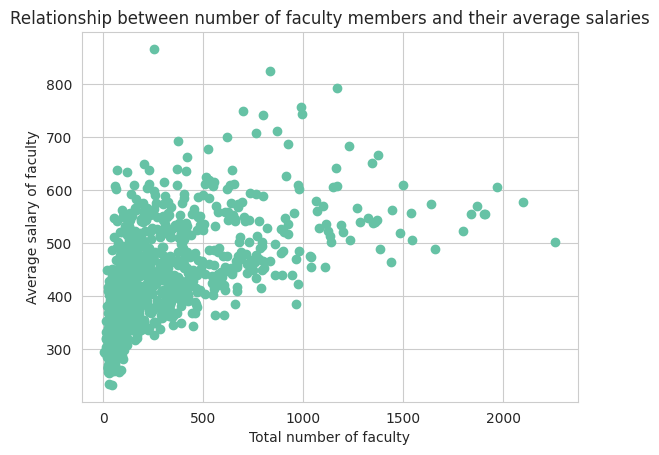


The university with the maximum average salary (i.e 866) for all ranks is California Inst. of Tech. with 257 all faculty members.

The university with the maximum number of faculty members(i.e 2261) for all ranks is University of Florida with average all-ranks salary of 501.

       Average salary-all ranks  Number of faculty-all ranks
count               1161.000000                  1161.000000
mean                 420.370370                   257.352283
std                   92.286719                   314.090563
min                  232.000000                     7.000000
25%                  352.000000                    68.000000
50%                  407.000000                   132.000000
75%                  475.000000                   323.000000
max                  866.000000                  2261.000000


In [ ]:
# question1
# find the plot and correlation between number of faculty members and their average salary distribution. Also find which university have maximum average salary and which university have maximum number of faculty members?

# Filter the dataframe to include only the relevant columns
df = aaupdf[['Average salary-all ranks', 'Number of faculty-all ranks']]

# Calculate the correlation coefficient
corr_coef = df.corr().iloc[0,1]

# Print the correlation coefficient
print(f"Correlation coefficient between average salary of faculty members and the number of faculty members: {corr_coef:.3f}")

# Plot a scatter plot to visualize the relationship between the two variables
plt.scatter(df['Number of faculty-all ranks'], df['Average salary-all ranks'])
plt.xlabel('Total number of faculty')
plt.ylabel('Average salary of faculty')
plt.title('Relationship between number of faculty members and their average salaries')
plt.show()

# get the row with the maximum average salary for all ranks
max_salary_row = aaupdf.loc[df['Average salary-all ranks'].idxmax()]

# get the name of the university with the maximum average salary for all ranks
max_salary_university = max_salary_row['College Name']

# get the number of all faculty members at the university with the maximum average salary for all ranks
max_salary_faculty = max_salary_row['Number of faculty-all ranks']

max_salary = df['Average salary-all ranks'].max()

print("")
print(f"The university with the maximum average salary (i.e {max_salary}) for all ranks is {max_salary_university} with {max_salary_faculty} all faculty members.")


# create a new DataFrame with relevant columns
df_faculty = aaupdf[['College Name', 'Average salary-all ranks', 'Number of faculty-all ranks']]

# sort the DataFrame by 'Number of faculty-all ranks'
df_faculty_sorted = df_faculty.sort_values('Number of faculty-all ranks', ascending=False)

# select the first row of the sorted DataFrame
highest_faculty = df_faculty_sorted.iloc[0]
max_faculty_university= highest_faculty['College Name']
num_highest_faculty=highest_faculty['Number of faculty-all ranks']
avg_highest_faculty=highest_faculty['Average salary-all ranks']

print("")
print(f"The university with the maximum number of faculty members(i.e {num_highest_faculty}) for all ranks is {max_faculty_university} with average all-ranks salary of {avg_highest_faculty}.")

# Select columns of interest
cols = ['Average salary-all ranks', 'Number of faculty-all ranks']
data = aaupdf[cols]

# Calculate summary statistics
summary_stats = data.describe()

# Print summary statistics
print("")
print(summary_stats)


State(Postal code)
WV    338.933333
KS    339.111111
WW    342.000000
SD    344.222222
MS    344.923077
ND    353.333333
MT    354.625000
SC    358.120000
KY    365.909091
AR    368.062500
ID    368.666667
NE    369.117647
OK    374.882353
MO    377.529412
AL    377.904762
LA    380.750000
TN    382.222222
IA    382.666667
NC    382.952381
VT    384.800000
IN    392.585366
ME    395.285714
OR    398.666667
OH    408.264151
NH    408.636364
WI    413.703704
VA    414.230769
TX    415.462963
NM    416.500000
GA    417.190476
IL    417.880000
MN    419.880000
WA    420.562500
UT    424.000000
CO    424.666667
MI    424.906250
FL    429.368421
DE    432.000000
MD    433.521739
AZ    434.250000
WY    445.000000
PA    448.670588
AK    450.750000
NY    464.271605
NV    480.000000
DC    488.777778
RI    494.625000
HI    495.333333
MA    504.238095
CT    509.437500
NJ    515.125000
CA    529.425926
Name: Average salary-all ranks, dtype: float64


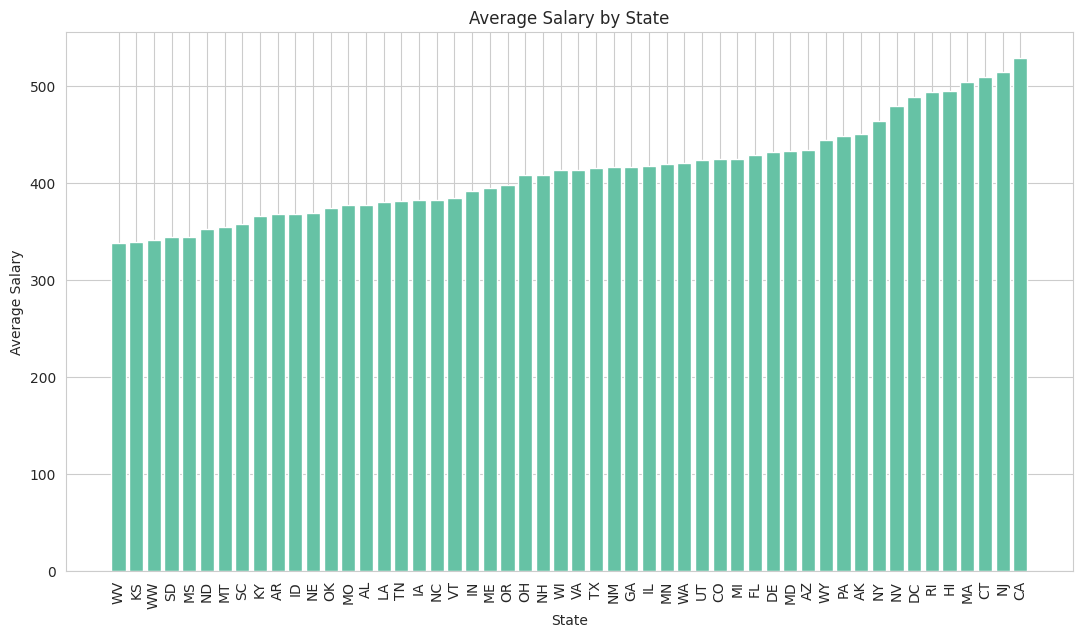

In [ ]:
# question2
# Calculate the mean of the average salaries of all ranks for each state. Also, find out which state pays less salary for its faculty members.
state_mean_salaries = aaupdf.groupby('State(Postal code)')['Average salary-all ranks'].mean().sort_values()
print(state_mean_salaries)

plt.figure(figsize=(13,7))
plt.bar(state_mean_salaries.index, state_mean_salaries.values)
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Average Salary')
plt.title('Average Salary by State')
plt.show()

      Average salary-all ranks  Average compensation-all ranks
Type                                                          
I                   533.666667                      665.594444
IIA                 439.950413                      553.931129
IIB                 375.925446                      470.322528
VIIB                342.000000                      418.000000


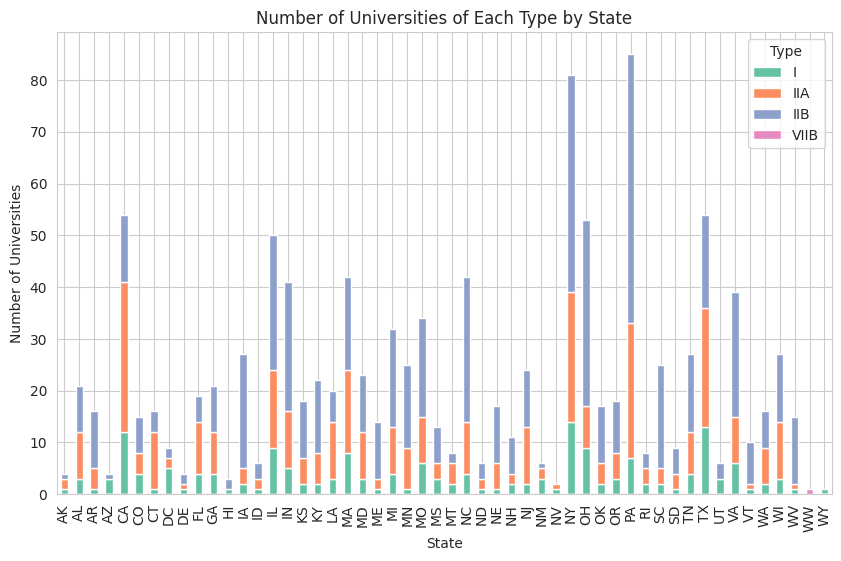

In [ ]:
# question3
# find out which type of universities offers more salaries and benfits to its faculty members. Also find out number of universities of each type by state
# group by type and calculate mean salaries and compensations
grouped = aaupdf.groupby('Type').agg({'Average salary-all ranks': 'mean', 'Average compensation-all ranks': 'mean'})

print(grouped)

# Group the data by state and type and count the number of universities in each group
grouped_data = aaupdf.groupby(['State(Postal code)', 'Type'])['College Name'].count().reset_index(name='Count')

# Pivot the data to create a table where the rows are states and the columns are university types
pivot_table = grouped_data.pivot(index='State(Postal code)', columns='Type', values='Count').fillna(0)

# Plot a stacked bar chart to visualize the data
pivot_table.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title('Number of Universities of Each Type by State')
plt.xlabel('State')
plt.ylabel('Number of Universities')
plt.show()


Correlation Coefficient between Average Salary and Compensation for all Faculty Members:  0.9894438420401281


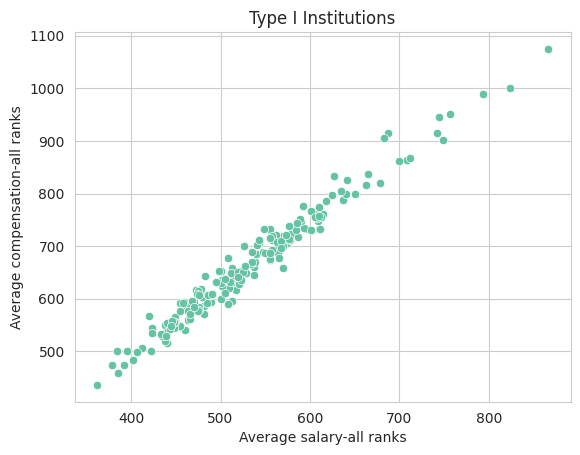

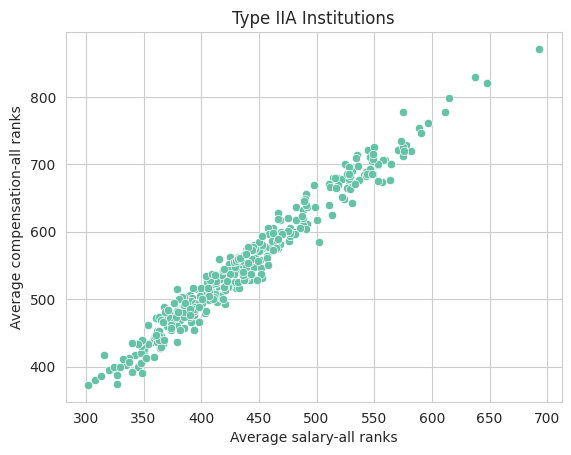

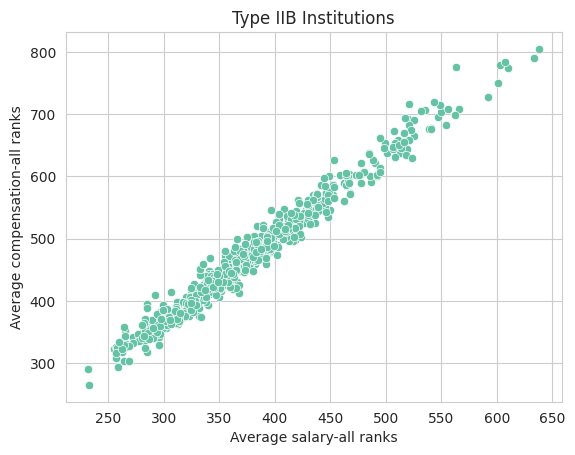

In [ ]:
# question4
# Is there a correlation between the average salary and compensation of faculty members across all ranks? Do different types of institutions (i.e., Type I, II, or VII) show different patterns in this relationship?
# calculate the correlation coefficient
corr_coef = np.corrcoef(aaupdf['Average salary-all ranks'], aaupdf['Average compensation-all ranks'])[0, 1]

print('Correlation Coefficient between Average Salary and Compensation for all Faculty Members: ', corr_coef)

# create scatterplot for Type I institutions
sns.scatterplot(x='Average salary-all ranks', y='Average compensation-all ranks', data=aaupdf[aaupdf['Type'] == 'I'])
plt.title('Type I Institutions')
plt.show()

# create scatterplot for Type II institutions
sns.scatterplot(x='Average salary-all ranks', y='Average compensation-all ranks', data=aaupdf[aaupdf['Type'] == 'IIA'])
plt.title('Type IIA Institutions')
plt.show()

# create scatterplot for Type VII institutions
sns.scatterplot(x='Average salary-all ranks', y='Average compensation-all ranks', data=aaupdf[aaupdf['Type'] == 'IIB'])
plt.title('Type IIB Institutions')
plt.show()


Average salaries:
Full professors: $ 524.14
Associate professors: $ 416.4
Assistant professors: $ 351.93


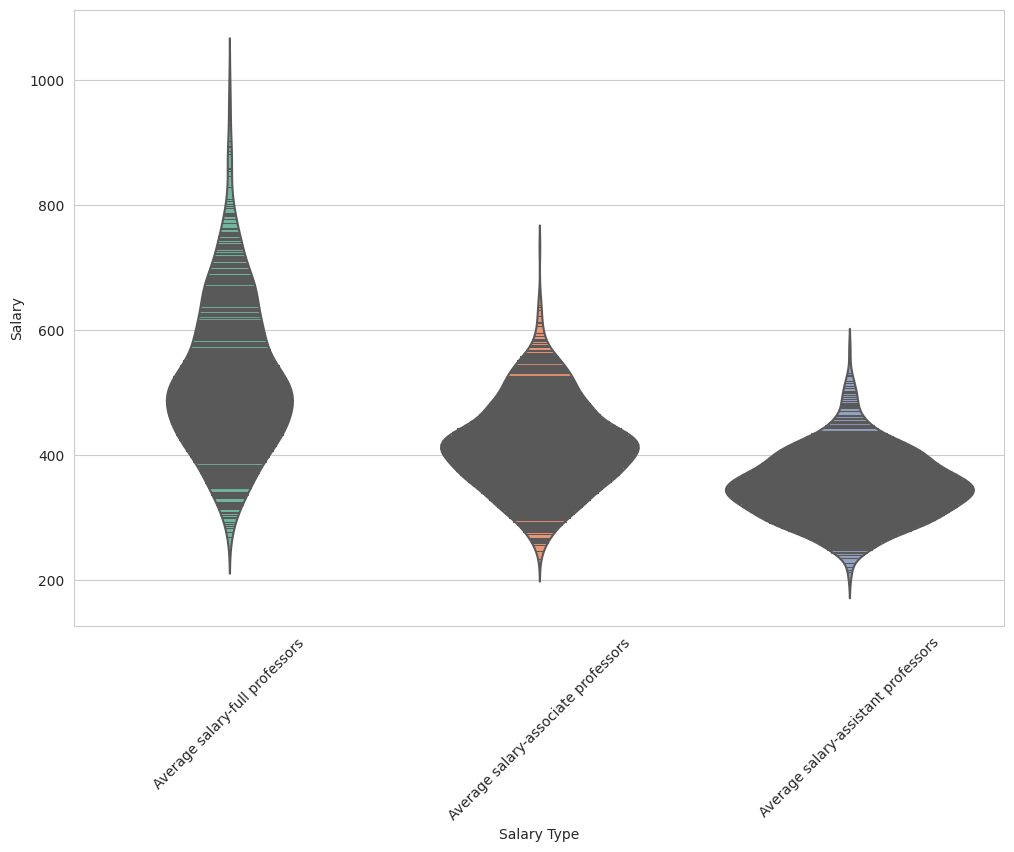

In [ ]:
# question5
# Are there any notable differences in the average salaries and benefits of full, associate, and assistant professors in institutes ? Plot the way they are distributed?
# Calculate the average salary for each rank
full_prof_salary = aaupdf['Average salary-full professors'].mean()
associate_prof_salary = aaupdf['Average salary-associate professors'].mean()
assistant_prof_salary = aaupdf['Average salary-assistant professors'].mean()

# Print the results
print("Average salaries:")
print("Full professors: $", round(full_prof_salary, 2))
print("Associate professors: $", round(associate_prof_salary, 2))
print("Assistant professors: $", round(assistant_prof_salary, 2))

plt.figure(figsize=(12, 8))

# Subset the data to include only the relevant columns
df_subset = aaupdf[['Average salary-full professors', 'Average salary-associate professors',
                'Average salary-assistant professors']]


sns.set_style('whitegrid')
# Melt the data into long format
df_melted = pd.melt(df_subset, var_name='Salary Type', value_name='Salary')

# Create a violin plot with rotated x-axis labels
sns.violinplot(x='Salary Type', y='Salary', data=df_melted, inner='stick' )
plt.xticks(rotation=45)

# Display the plot
plt.show()



USNEWS DATASET

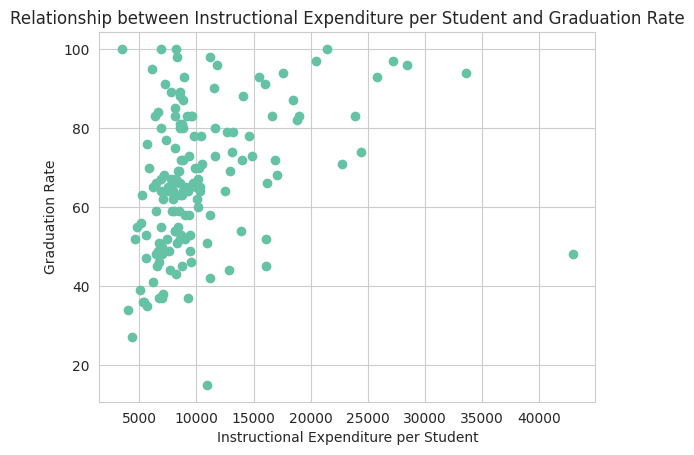

Correlation coefficient: 0.3382378770067571


In [ ]:
# question6
#  Does a higher instructional expenditure per student lead to higher graduation rates?
# select the relevant columns
df = usnewsdf[['Instructional expenditure per student', 'Graduation rate']]

# remove any rows with missing values
df = df.dropna()

# calculate the correlation coefficient
corr = np.corrcoef(df['Instructional expenditure per student'], df['Graduation rate'])[0, 1]

# plot the data
plt.scatter(df['Instructional expenditure per student'], df['Graduation rate'])
plt.title('Relationship between Instructional Expenditure per Student and Graduation Rate')
plt.xlabel('Instructional Expenditure per Student')
plt.ylabel('Graduation Rate')
plt.show()

# print the correlation coefficient
print('Correlation coefficient:', corr)

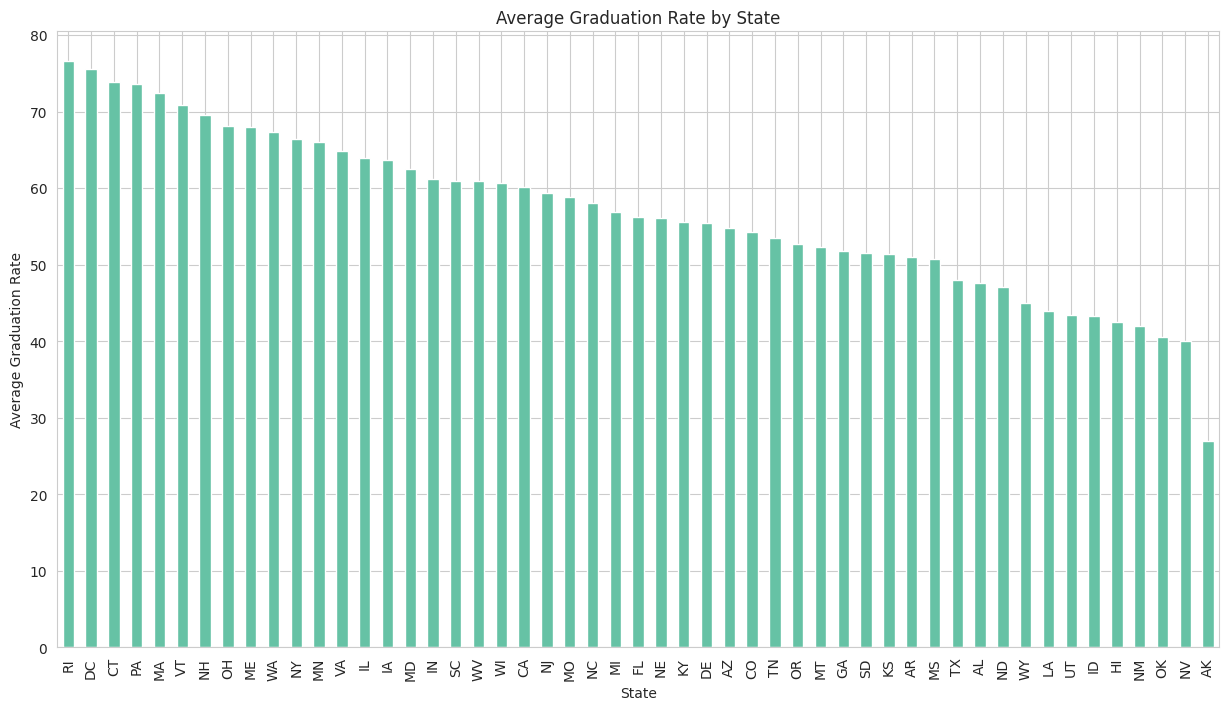

In [ ]:
# question7
# find out the bar graph for state-wise mean average graduation rate
# Group the data by state and calculate the average graduation rate for each state
grad_rate_by_state = usnewsdf.groupby('State(Postal code)')['Graduation rate'].mean().sort_values(ascending=False)

# Create a bar chart to visualize the differences in graduation rates between states
grad_rate_by_state.plot(kind='bar', figsize=(15,8))
plt.title('Average Graduation Rate by State')
plt.xlabel('State')
plt.ylabel('Average Graduation Rate')
plt.show()

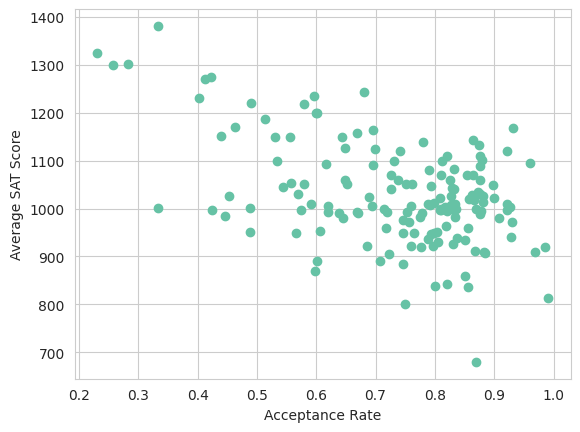

-0.5005231715811069


In [ ]:
# question8
# How does the acceptance rate relate to the average sat score?
usnewsdf=usnewsdf.dropna()
# Calculate acceptance rate
usnewsdf['Acceptance Rate'] = usnewsdf['Number of applicants accepted'] / usnewsdf['Number of applications received']

# Scatter plot of acceptance rate vs average SAT score
plt.scatter(usnewsdf['Acceptance Rate'], usnewsdf['Average Combined SAT score'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Average SAT Score')
plt.show()

corr1 = np.corrcoef(usnewsdf['Acceptance Rate'], usnewsdf['Average Combined SAT score'])[0, 1]

print(corr1)


<ipython-input-119-5b25a3fea050>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  acceptance_by_type = usnewsdf.groupby('Public/private indicator (public=1, private=2)')['Number of applicants accepted', 'Number of applications received'].sum()


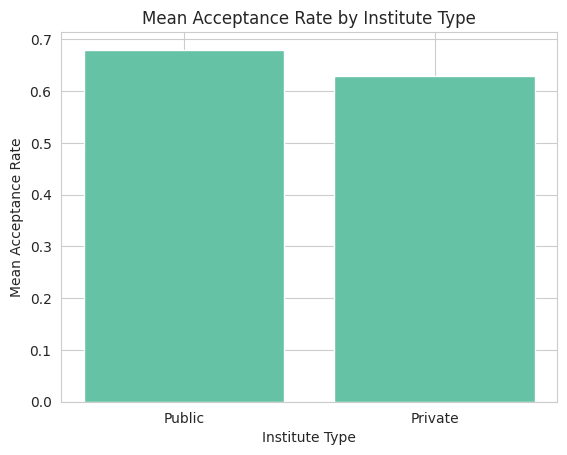

In [ ]:
# question9
#  which type of institutes( public or private) have higher acceptance rates?
acceptance_by_type = usnewsdf.groupby('Public/private indicator (public=1, private=2)')['Number of applicants accepted', 'Number of applications received'].sum()
acceptance_by_type['Acceptance Rate'] = acceptance_by_type['Number of applicants accepted'] / acceptance_by_type['Number of applications received']
acceptance_by_type = acceptance_by_type.reset_index()

plt.bar(acceptance_by_type['Public/private indicator (public=1, private=2)'], acceptance_by_type['Acceptance Rate'])
plt.xticks([1, 2], ['Public', 'Private'])
plt.title('Mean Acceptance Rate by Institute Type')
plt.xlabel('Institute Type')
plt.ylabel('Mean Acceptance Rate')
plt.show()


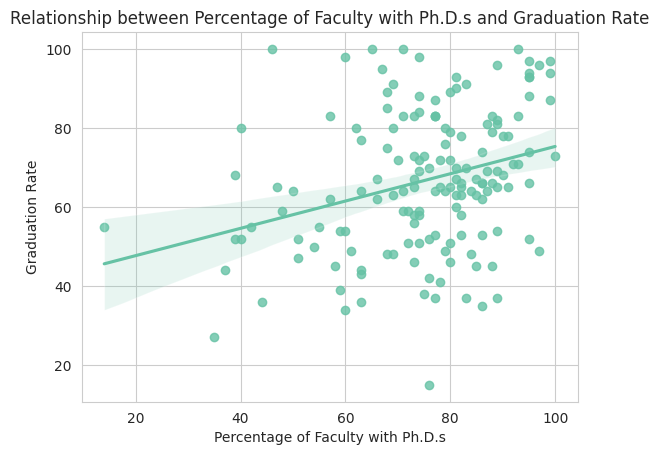

Correlation coefficient: 0.2981182294339352


In [ ]:
# question10
# Do colleges with higher percentages of faculty with Ph.D.s have higher graduation rates?
# Subset the data to only include relevant columns
usnewsdf = usnewsdf[['Pct. of faculty with Ph.D.s', 'Graduation rate']]

# Drop rows with missing values
usnewsdf = usnewsdf.dropna()

# Calculate the correlation between percentage of faculty with Ph.D.s and graduation rate
corr = usnewsdf['Pct. of faculty with Ph.D.s'].corr(usnewsdf['Graduation rate'])

# Plot the relationship between percentage of faculty with Ph.D.s and graduation rate
sns.regplot(x='Pct. of faculty with Ph.D.s', y='Graduation rate', data=usnewsdf)

plt.title('Relationship between Percentage of Faculty with Ph.D.s and Graduation Rate')
plt.xlabel('Percentage of Faculty with Ph.D.s')
plt.ylabel('Graduation Rate')
plt.show()

print('Correlation coefficient:', corr)
